In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = r'C:\Users\Shree\Downloads\Face Mask Dataset\Train'
validation_dir = r'C:\Users\Shree\Downloads\Face Mask Dataset\Validation'
test_dir =r'C:\Users\Shree\Downloads\Face Mask Dataset\Test'

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=40)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 447s 894ms/step - loss: 0.1518 - acc: 0.9399 - val_loss: 0.0426 - val_acc: 0.9900
Epoch 2/20
500/500 [==============================] - 754s 2s/step - loss: 0.0514 - acc: 0.9821 - val_loss: 0.0373 - val_acc: 0.9875
Epoch 3/20
500/500 [==============================] - 492s 983ms/step - loss: 0.0327 - acc: 0.9880 - val_loss: 0.0142 - val_acc: 0.9950
Epoch 4/20
500/500 [==============================] - 456s 912ms/step - loss: 0.0263 - acc: 0.9906 - val_loss: 0.0156 - val_acc: 0.9975
Epoch 5/20
500/500 [==============================] - 422s 844ms/step - loss: 0.0229 - acc: 0.9920 - val_loss: 0.0259 - val_acc: 0.9900
Epoch 6/20
363/500 [====================>.........] - ETA: 6:31 - loss: 0.0209 - acc: 0.9934

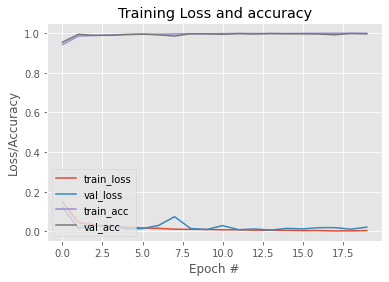

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot")

In [12]:
model.save("model_cnn_project_P1.h5")

In [ ]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=300,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25)

In [13]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

80142336/80134624 [==============================] - 9s 0us/step


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Final_Project_Model-{epoch:02d}.h5")

In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=100,
      callbacks=[checkpoint_cb])

Epoch 1/2
10/10 [==============================] - 226s 23s/step - loss: 0.0397 - acc: 0.9850 - val_loss: 0.0237 - val_acc: 0.9962
Epoch 2/2
10/10 [==============================] - 116s 12s/step - loss: 0.0073 - acc: 1.0000


In [23]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 992 images belonging to 2 classes.


In [26]:
model.evaluate(test_generator, steps=31)

31/31 [==============================] - 134s 4s/step - loss: 0.0152 - acc: 0.9929


[0.015248811803758144, 0.992943525314331]